# Bar Chart Race in Python with Matplotlib

~In roughly less than 50 lines of code.
https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41

### import the dependent libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

### Data
The data used is from faa.gov and shows aircraft airworthiness certificate registrations per state over time.

In [26]:
df = pd.read_csv('acdata.csv')

In [27]:
df.head(3)
df.tail(10)

YearAW State  Aircraft   Region
3806    2019    TN        65  Eastern
3807    2019    TX       314  Central
3808    2019    UT       222  Western
3809    2019    VA        43  Eastern
3810    2019    VI         1  Eastern
3811    2019    VT         5  Eastern
3812    2019    WA       131  Western
3813    2019    WI        53  Eastern
3814    2019    WV         4  Eastern
3815    2019    WY        22  Central

### Color, Labels

We'll user `colors` and `group_lk` to add color to the bars.

Group the states by region.

In [29]:
colors = dict(zip(
    ["AlaskaHawaii", "Western", "Central", "Eastern"],
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381"]
))
group_lk = df.set_index('State')['Region'].to_dict()

In [46]:
colors=['#adb0ff', '#ffb3ff', '#90d595', '#90d595', '#e48381', '#e48381', '#aafbff', '#aafbff', 
      '#f7bb5f', '#eafb50', '#FA8072', '#FF69B4', '#FF69B4', '#C71585', '#FF6347', '#FF4500', '#FFD700', '#FFFF00', 
     '#FFDAB9', '#BDB76B', '#D8BFD8', '#9370DB', '#663399', '#4B0082', '#ADFF2F', '#00FF00',
      '#90EE90', '#228B22', '#66CDAA', '#008B8B', '#00FFFF', '#40E0D0', '#87CEFA', '#1E90FF',
    '#4169E1', '#FFF8DC', '#F4A460', '#D2691E', '#FFF0F5', '#FFE4E1', '#C0C0C0', '#DCDCDC',
    '#FAEBD7', '#FAF0E6', '#FFDEAD', '#B0C4DE', '#6495ED', '#AFEEEE', '#8FBC8B', '#98FB98',
    '#EEE8AA', '#FFEFD5', '#FFA500', '#CD5C5C']

In [30]:
current_year = 2018
dff = df[df['YearAW'].eq(current_year)].sort_values(by='Aircraft', ascending=False).head(10)
dff

YearAW State  Aircraft   Region
3753    2018    TX       362  Central
3717    2018    FL       335  Eastern
3712    2018    CA       332  Western
3754    2018    UT       321  Western
3716    2018    DE       299  Eastern
3757    2018    WA       156  Western
3746    2018    OR       136  Western
3718    2018    GA       136  Eastern
3711    2018    AZ       132  Western
3743    2018    NY       128  Eastern

### Basic chart

Now, let's plot a basic bar chart. We start by creating a figure and an axes.
Then, we use `ax.barh(x, y)` to draw horizontal barchart.


<BarContainer object of 10 artists>

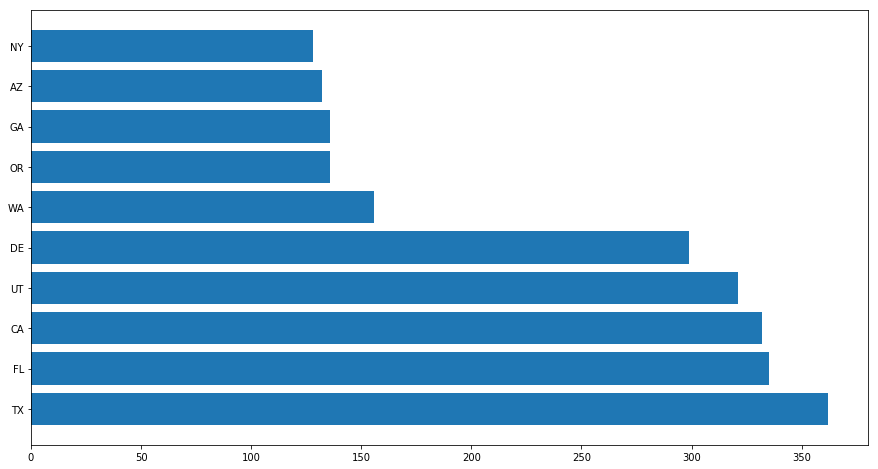

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['State'], dff['Aircraft'])

Text(1, 0.4, '2018')

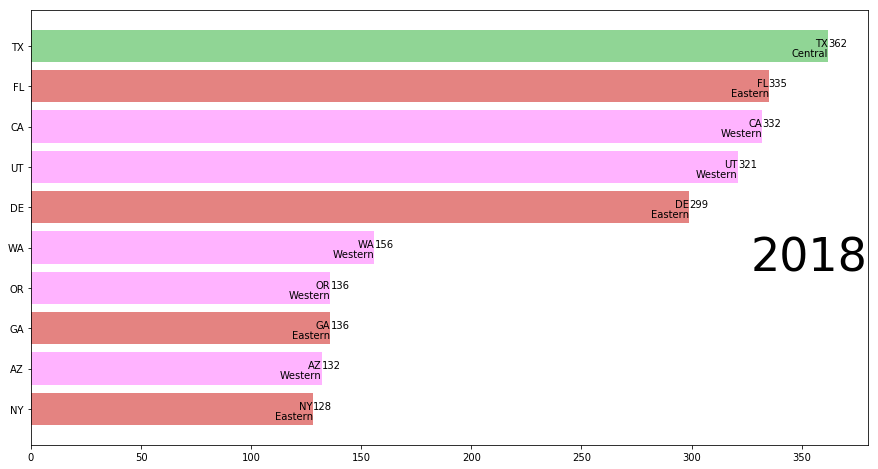

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]
ax.barh(dff['State'], dff['Aircraft'], color=[colors[group_lk[x]] for x in dff['State']])
for i, (Aircraft, State) in enumerate(zip(dff['Aircraft'], dff['State'])):
    ax.text(Aircraft, i,     State,            ha='right')
    ax.text(Aircraft, i-.25, group_lk[State],  ha='right')
    ax.text(Aircraft, i,     Aircraft, ha='left')
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

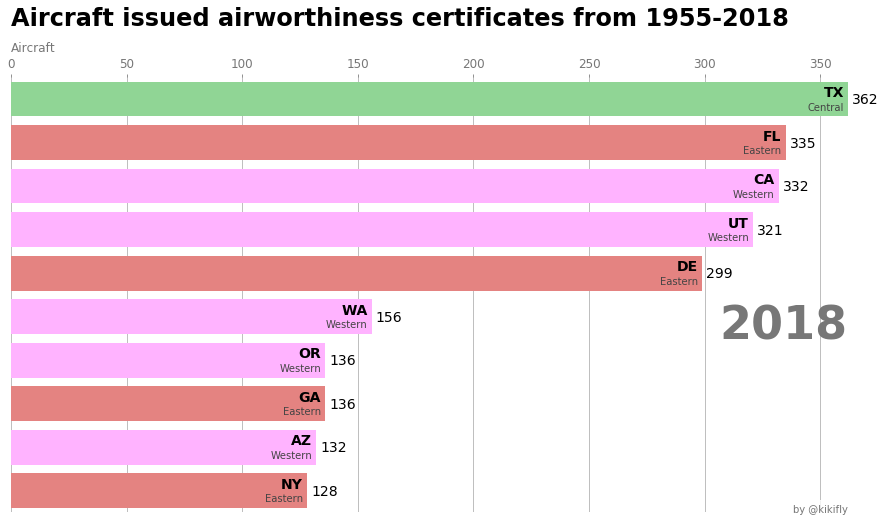

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(YearAW):
    dff = df[df['YearAW'].eq(YearAW)].sort_values(by='Aircraft', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['State'], dff['Aircraft'], color=[colors[group_lk[x]] for x in dff['State']])
    dx = dff['Aircraft'].max() / 200
    for i, (Aircraft, State) in enumerate(zip(dff['Aircraft'], dff['State'])):
        ax.text(Aircraft-dx, i,     State,           size=14, weight=600, ha='right', va='bottom')
        ax.text(Aircraft-dx, i-.25, group_lk[State], size=10, color='#444444', ha='right', va='baseline')
        ax.text(Aircraft+dx, i,     f'{Aircraft:,.0f}',  size=14, ha='left',  va='center')
        
    # ... polished styles
    ax.text(1, 0.4, YearAW, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Aircraft', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Aircraft issued airworthiness certificates from 1955-2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @kikifly', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

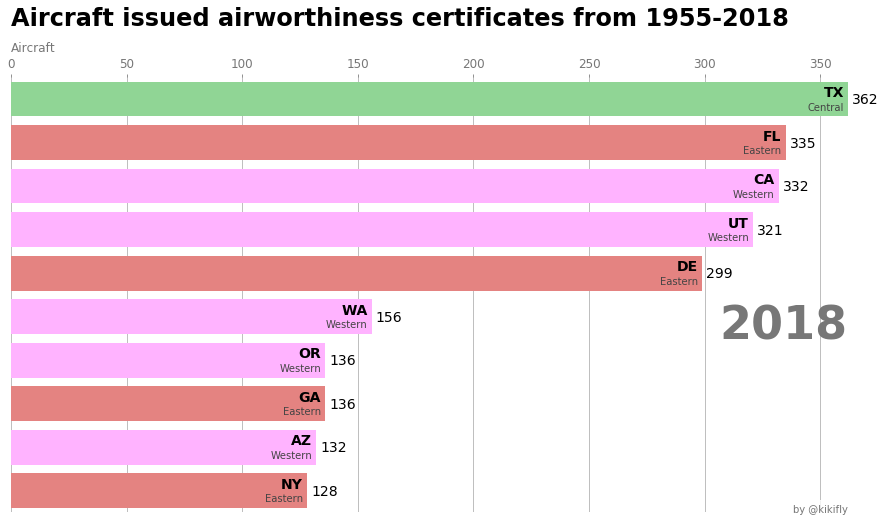

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(2018)

Matplotlib is a massive library, being able to adjust every aspect of a plot is powerful
but it can be complex / time-consuming for highly customized charts.
Atleast, for these bar chart races, it was fairly quick!

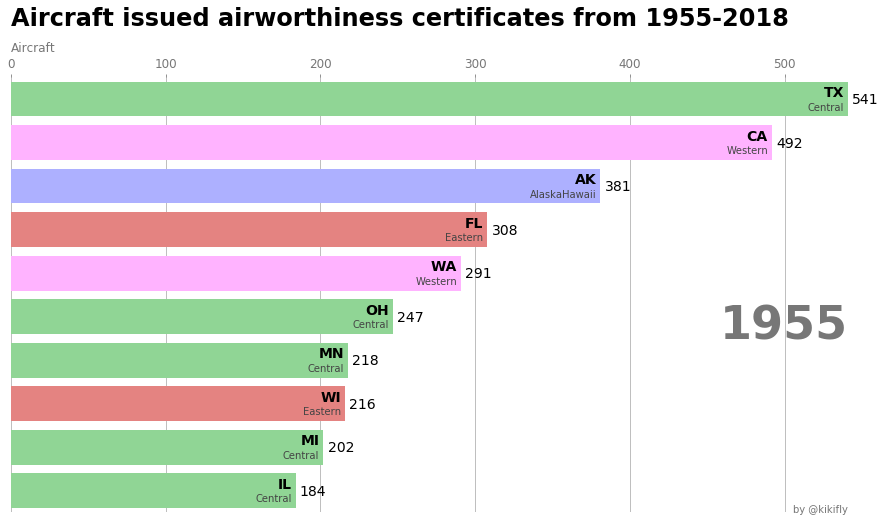

In [51]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1955, 2019))
HTML(animator.to_jshtml()) 
## or use animator.to_html5_video() or animator.save()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1955, 2019))
HTML(animator.save(dff))
# or use animator.to_html5_video() or animator.save()

In [52]:
from PIL import Image, ImageDraw

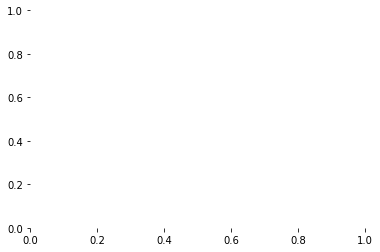

In [53]:
animator.save('animation.gif', writer='imagemagick', fps=60)

### xkcd-style

Turning your matplotlib plots into xkcd styled ones is pretty easy.
You can simply turn on `xkcd` sketch-style drawing mode with `plt.xkcd`.

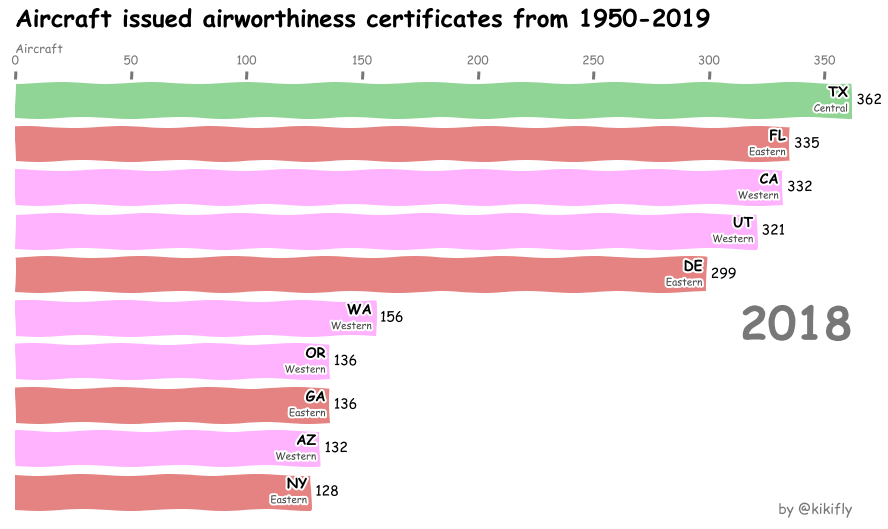

In [38]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 8))
    draw_barchart(2018)

# Save File

In [ ]:
!brew install imagemagick

In [ ]:
animator.save('../../files/animation.gif', writer='imagemagick', fps=60)

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
animation.save('barchart.gif', format='GIF')